# Regression - Predicting Software Reselling Profits.

Tayko Software is a software catalog firm that sells games and educational software. It started out as a software manufacturer and then added third-party titles to its oﬀerings. It recently revised its collection of items in a new catalog, which it mailed out to its customers. This mailing yielded 2000 purchases. Based on these data, Tayko wants to devise a model for predicting the spending amount that a purchasing customer will yield. The file _Tayko.csv_ contains information on 2000 purchases. Table 6.12 describes the variables to be used **(FREQ, LAST_UPDATE, WEB, GENDER, ADDRESS_RES, ADDRESS_US, SPENDING (outcome)** in the problem (the Excel file contains additional variables).

In [4]:
import pandas as pd
# load the data
tayko_df = pd.read_csv("/Users/hojin/Desktop/Baruch/CIS9660 Data Mining/9660_datasets/Tayko.csv")

In [5]:
tayko_df.rename(columns = {'Web order':'Web_order'}, inplace = True)
tayko_df.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web_order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [4]:
tayko_df = tayko_df.loc[:,['Freq','last_update_days_ago', 'Web_order','Gender=male','Address_is_res','US','Spending']]

In [5]:
tayko_df.head(100)

,Freq,last_update_days_ago,Web_order,Gender=male,Address_is_res,US,Spending
0,2,3662,1,0,1,1,128
1,0,2900,1,1,0,1,0
2,2,3883,0,0,0,1,127
3,1,829,0,1,0,1,0
4,1,869,0,0,0,1,0
...,...,...,...,...,...,...,...
95,1,2548,1,0,0,1,230
96,0,2740,0,0,0,1,0
97,0,217,0,0,0,1,0
98,1,366,0,1,0,0,0


In [6]:
tayko_df.shape

(2000, 7)

In [7]:
# check data types of variables in the data
tayko_df.dtypes

Freq                    int64
last_update_days_ago    int64
Web_order               int64
Gender=male             int64
Address_is_res          int64
US                      int64
Spending                int64
dtype: object

In [6]:
#code here
import numpy as np
tayko_df.pivot_table(values = 'Spending', index = 'Gender=male', aggfunc=[np.mean, np.std])

,mean,std
,Spending,Spending
Gender=male,,
0,107.339642,190.83233
1,98.350810,183.02006


In [9]:
#code here
import numpy as np
tayko_df.pivot_table(values='Spending', index = 'Web_order', aggfunc=[np.mean, np.std])

,mean,std
,Spending,Spending
Web_order,,
0,82.902439,173.417088
1,129.199531,200.463840


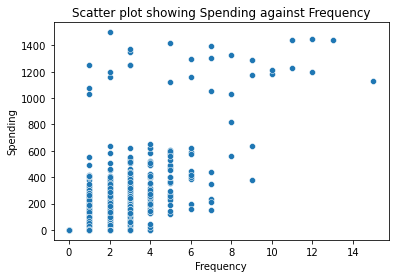

In [10]:
# plot of spending against frequency
#code here plot. remember to import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = 'Freq', y = 'Spending', data = tayko_df)
plt.title('Scatter plot showing Spending against Frequency')
plt.ylabel('Spending')
plt.xlabel('Frequency')
plt.show()

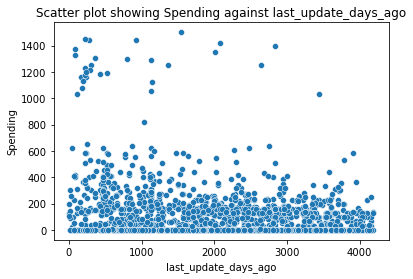

In [11]:
# plot Spending against last_update_days_ago
#scatter plot code here
sns.scatterplot(x='last_update_days_ago', y = 'Spending', data = tayko_df)
plt.title('Scatter plot showing Spending against last_update_days_ago')
plt.ylabel('Spending')
plt.xlabel('last_update_days_ago')
plt.show()

There appears to be no relationship between Spending and Last_Update but two grous of points similar to what we seen in case of Spending and Frequency above.

In [7]:
# predictors and outcome
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
predictors = ['US', 'Freq', 'last_update_days_ago', 'Web_order', 'Gender=male', 'Address_is_res']
outcome = 'Spending'
X = pd.get_dummies(tayko_df[predictors], drop_first = True)
y = tayko_df[outcome]

# partition data
#train_test_split code here
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (1200, 6) Validation set: (800, 6)


In [8]:
# fit the regression model
#code here
tayko_lm = LinearRegression()
tayko_lm.fit(train_X, train_y)

# print coefficients
print('Intercept', tayko_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': tayko_lm.coef_}))

Intercept 10.176297414610474
              Predictor  coefficient
0                    US    -4.620293
1                  Freq    91.274450
2  last_update_days_ago    -0.010374
3             Web_order    18.628731
4           Gender=male    -9.111366
5        Address_is_res   -75.815354


The Regression equation is:

Spending = Intercept + (coeff1 * US) + ... + (coeffn * Address_is_res)

In [9]:
from sklearn import metrics
prediction = tayko_lm.predict(valid_X)
print('MAE:', metrics.mean_absolute_error(valid_y, prediction))
print('MSE:', metrics.mean_squared_error(valid_y,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(valid_y, prediction)))

# 교수님 answer
# 
# print('MAE:', metrics.mean_absolute_error(valid_y, tayko_lm_predicted))
# print('MSE:', metrics.mean_squared_error(valid_y, tayko_lm_predicted))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(valid_y, tayko_lm_predcited)))

MAE: 83.60097261985858
MSE: 18697.735690891222
RMSE: 136.7396639270816


In [22]:
tayko_df.head(100)

,Freq,last_update_days_ago,Web_order,Gender=male,Address_is_res,US,Spending
0,2,3662,1,0,1,1,128
1,0,2900,1,1,0,1,0
2,2,3883,0,0,0,1,127
3,1,829,0,1,0,1,0
4,1,869,0,0,0,1,0
...,...,...,...,...,...,...,...
95,1,2548,1,0,0,1,230
96,0,2740,0,0,0,1,0
97,0,217,0,0,0,1,0
98,1,366,0,1,0,0,0


<ipython-input-26-aa54c813d402>:1: RuntimeWarning: divide by zero encountered in log
  np.log(tayko_df[tayko_df.Spending>0])['Spending'].hist()


<AxesSubplot:>

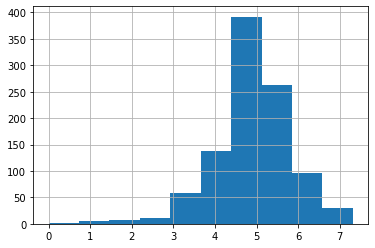

In [26]:
np.log(tayko_df[tayko_df.Spending>0])['Spending'].hist()

In [20]:
# # professor's answer
# import math
# tayko_lm_pred = tayko_lm.predict(valid_X)
# all_residuals = valid_y - tayko_lm_pred
# ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=30)
# plt.tight_layout()
# plt.show()

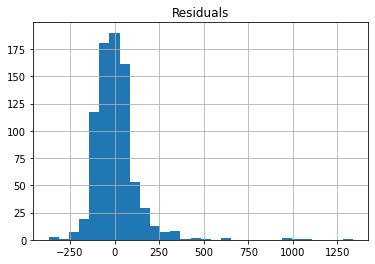

In [15]:
# compute and plot the residuals for validation data
import matplotlib.pyplot as plt
predictions = tayko_lm.predict(valid_X)
result = pd.DataFrame({'Predicted':predictions, 'Actual':valid_y, 'Residual': valid_y - predictions})
plt.hist(result['Residual'], bins=30)
plt.title("Residuals")
plt.grid()

In [ ]:
# It's a right skewed histogram. 